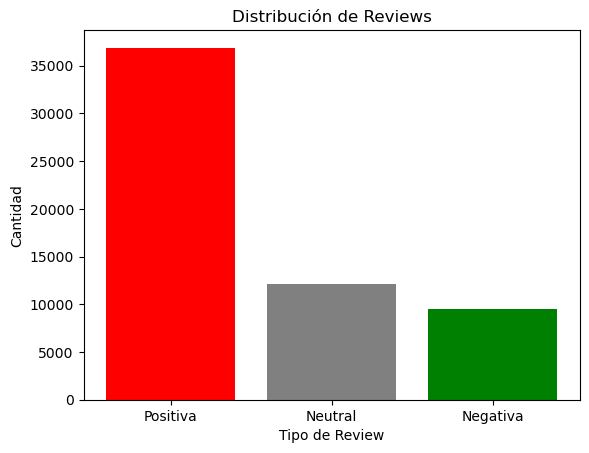

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyarrow.parquet as pq

# Directorio que contiene los archivos Parquet
dir = '../data_sources/parquet/user_reviews'

# Lista para almacenar los DataFrames
list_of_dfs = []

# Recorrer los archivos Parquet en el directorio
for file in os.listdir(dir):
    if file.endswith('.parquet'):
        # Leer el archivo Parquet
        list_of_dfs.append(pq.read_table(os.path.join(dir, file)).to_pandas())

users_reviews_df = pd.concat(list_of_dfs, ignore_index=True)

# Mapear la escala a los valores numéricos de las reviews
# 0: Negativa, 1: Neutral, 2: Positiva
scale_map = {0: 'Negativa', 1: 'Neutral', 2: 'Positiva'}

# Reemplazar los valores de las reviews por la escala correspondiente
users_reviews_df['review'] = users_reviews_df['review'].map(scale_map)

# Contar el número de cada tipo de review
review_counts = users_reviews_df['review'].value_counts()

# Crear un gráfico de barras
plt.bar(review_counts.index, review_counts.values, color=['red', 'gray', 'green'])

# Establecer título y etiquetas
plt.title('Distribución de Reviews')
plt.xlabel('Tipo de Review')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()